In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats.stats import pearsonr, spearmanr, kendalltau, kruskal
from scipy.stats import chi2_contingency, shapiro, anderson

In [39]:
data = pd.read_csv('auto-mpg.csv')
qualitive_variables = ['cylinders', 'origin']
quantitative = data.drop(qualitive_variables, axis=1)
quantitive_variables = list(quantitative)

In [40]:
qualitive_variables, quantitive_variables

(['cylinders', 'origin'], ['mpg', 'weight', 'acceleration'])

In [41]:
data.head()

,mpg,cylinders,weight,acceleration,origin
0,18.0,8,3504,12.0,1
1,15.0,8,3693,11.5,1
2,18.0,8,3436,11.0,1
3,16.0,8,3433,12.0,1
4,17.0,8,3449,10.5,1


In [42]:
len(data)

398

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   weight        398 non-null    int64  
 3   acceleration  398 non-null    float64
 4   origin        398 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 15.7 KB


In [44]:
data.describe()

,mpg,cylinders,weight,acceleration,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,2970.424623,15.568090,1.572864
std,7.815984,1.701004,846.841774,2.757689,0.802055
min,9.000000,3.000000,1613.000000,8.000000,1.000000
25%,17.500000,4.000000,2223.750000,13.825000,1.000000
50%,23.000000,4.000000,2803.500000,15.500000,1.000000
75%,29.000000,8.000000,3608.000000,17.175000,2.000000
max,46.600000,8.000000,5140.000000,24.800000,3.000000


In [45]:
data.isnull().sum()

mpg             0
cylinders       0
weight          0
acceleration    0
origin          0
dtype: int64

In [46]:
data.median()

mpg               23.0
cylinders          4.0
weight          2803.5
acceleration      15.5
origin             1.0
dtype: float64

In [47]:
for column in quantitive_variables:
    quartiles = np.quantile(data[column], [0.25, 0.75])
    print(column)
    print('Нижний квартиль: ', quartiles[0])
    print('Верхний квартиль: ', quartiles[1])
    print('Межквартильный размах: ', quartiles[1] - quartiles[0])
    print('Коэффициент асимметрии: ', data[column].skew())
    print('Коэффициент эксцесса: ', data[column].kurtosis())

mpg
Нижний квартиль:  17.5
Верхний квартиль:  29.0
Межквартильный размах:  11.5
Коэффициент асимметрии:  0.45706634399491913
Коэффициент эксцесса:  -0.5107812652123154
weight
Нижний квартиль:  2223.75
Верхний квартиль:  3608.0
Межквартильный размах:  1384.25
Коэффициент асимметрии:  0.5310625125994629
Коэффициент эксцесса:  -0.7855289051011454
acceleration
Нижний квартиль:  13.825000000000001
Верхний квартиль:  17.174999999999997
Межквартильный размах:  3.349999999999996
Коэффициент асимметрии:  0.27877684462588986
Коэффициент эксцесса:  0.4194968829706842


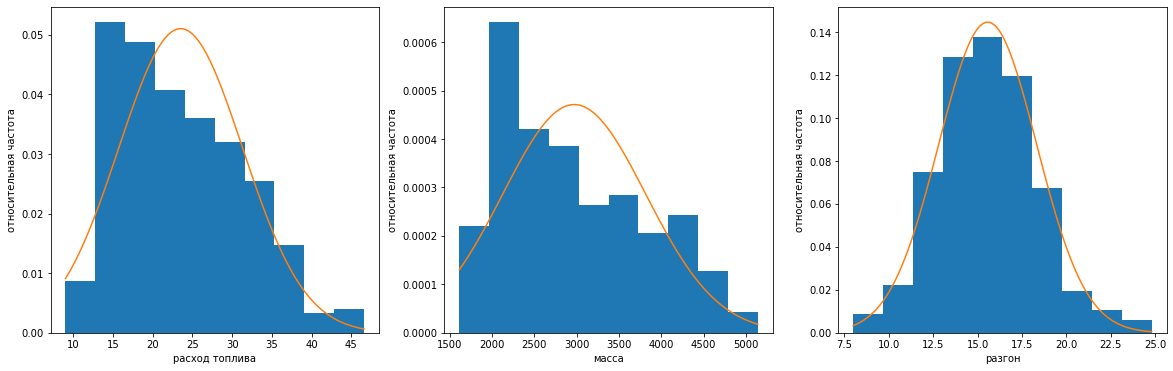

In [48]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
labels = ['расход топлива', 'масса', 'разгон']

for i in range(3):
    ax = axs[i]
    mu = data[quantitive_variables[i]].mean()
    sigma = data[quantitive_variables[i]].std()
    x = data[quantitive_variables[i]]
    n, bins, patches = ax.hist(x, bins='sturges', density=True)
    t = np.linspace(bins[0], bins[-1], 100)
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (t - mu))**2))
    ax.plot(t, y)
    ax.set_xlabel(labels[i])
    ax.set_ylabel('относительная частота')

plt.savefig('histograms_quantitive')

In [49]:
for i in range(3):
    _, p = shapiro(data[quantitive_variables[i]])
    print(f"p-value = {p} на нормальность для {quantitive_variables[i]}")

p-value = 1.1832412383228075e-07 на нормальность для mpg
p-value = 1.9702153103429154e-11 на нормальность для weight
p-value = 0.039872437715530396 на нормальность для acceleration


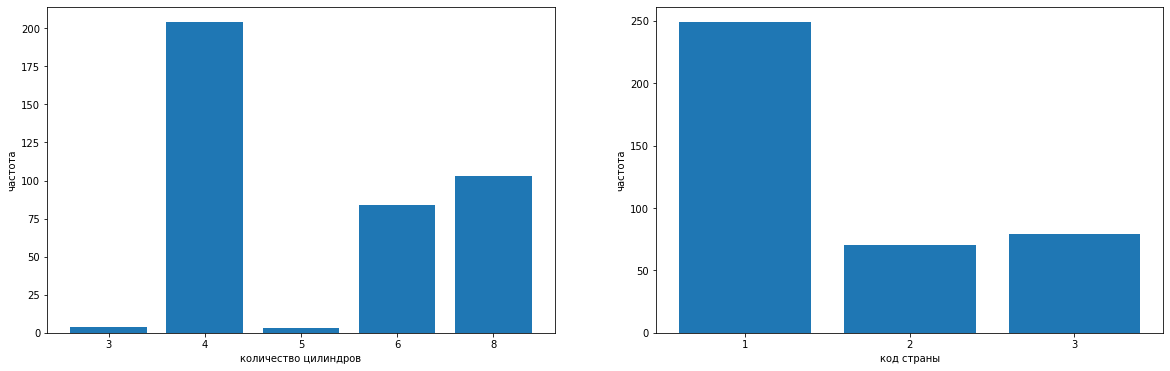

In [50]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

values = []
bars = list(map(str, sorted(data['cylinders'].unique())))
for j in bars:
    values.append(len(data[data['cylinders'] == int(j)]))
ax = axs[0]
ax.bar(bars, values)
ax.set_xlabel('количество цилиндров')
ax.set_ylabel('частота')

values = []
bars = list(map(str, sorted(data['origin'].unique())))
for j in bars:
    values.append(len(data[data['origin'] == int(j)]))
ax = axs[1]
ax.bar(bars, values)
x = np.arange(len(bars))
ax.set_xticks(x)
ax.set_xticklabels(bars)
ax.set_xlabel('код страны')
ax.set_ylabel('частота')

plt.savefig('histograms_qualitive')

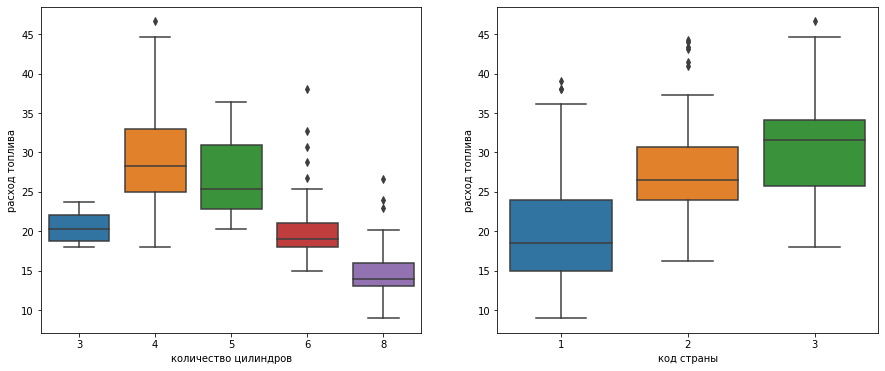

In [51]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
labels = ['количество цилиндров', 'код страны']
for i in range(2):
    sns.boxplot(ax=axs[i], x=qualitive_variables[i], y='mpg', data=data)
    axs[i].set_xlabel(labels[i])
    axs[i].set_ylabel('расход топлива')
plt.savefig('boxplots')

In [52]:
for x in qualitive_variables:
    _, pvalue = kruskal(data[x], data['mpg'])
    print(f'C использованием критерия Краскела-Уоллиса для mpg и {x} p-value = {pvalue}')

C использованием критерия Краскела-Уоллиса для mpg и cylinders p-value = 2.2810378881449984e-134
C использованием критерия Краскела-Уоллиса для mpg и origin p-value = 5.057612395144872e-136


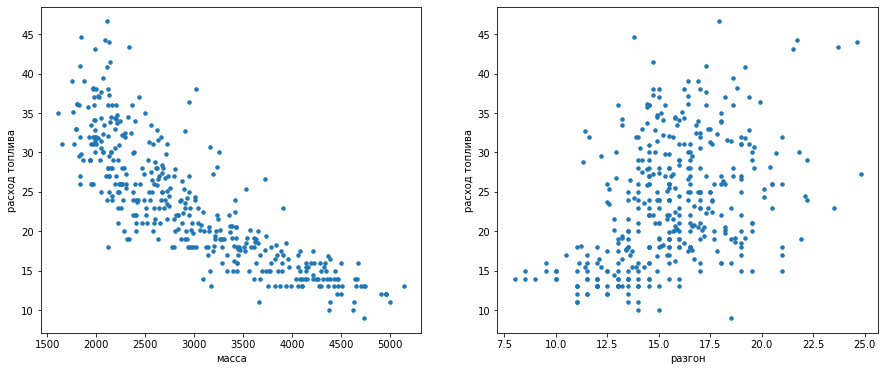

In [53]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
axs[0].scatter(data['weight'], data['mpg'], 12)
axs[0].set_xlabel('масса')
axs[0].set_ylabel('расход топлива')
axs[1].scatter(data['acceleration'], data['mpg'], 12)
axs[1].set_xlabel('разгон')
axs[1].set_ylabel('расход топлива')
plt.savefig('scatters')

In [54]:
for x in ['weight', 'acceleration']:
    print(f'Коэффициенты корреляции и значимость для {x} и mpg:')
    corr, pvalue = pearsonr(data[x], data['mpg'])
    print(f'Коэффициент корреляции Пирсона = {corr}, p-value = {pvalue}')
    corr, pvalue = spearmanr(data[x], data['mpg'])
    print(f'Коэффициент корреляции Спирмена = {corr}, p-value = {pvalue}')
    corr, pvalue = kendalltau(data[x], data['mpg'])
    print(f'Коэффициент корреляции тау Кендалла = {corr}, p-value = {pvalue}')

Коэффициенты корреляции и значимость для weight и mpg:
Коэффициент корреляции Пирсона = -0.831740933244335, p-value = 2.9727995640500577e-103
Коэффициент корреляции Спирмена = -0.8749473981990712, p-value = 8.643768710426594e-127
Коэффициент корреляции тау Кендалла = -0.6940061864338256, p-value = 2.6183413908064774e-93
Коэффициенты корреляции и значимость для acceleration и mpg:
Коэффициент корреляции Пирсона = 0.42028891210165065, p-value = 1.823091535078553e-18
Коэффициент корреляции Спирмена = 0.4386774795708622, p-value = 3.7760574238172543e-20
Коэффициент корреляции тау Кендалла = 0.3010959084675936, p-value = 1.3015056777023316e-18


In [55]:
pd.crosstab(data['cylinders'], data['origin'])

origin,1,2,3
cylinders,,,
3,0,0,4
4,72,63,69
5,0,3,0
6,74,4,6
8,103,0,0


In [56]:
observation = pd.crosstab(data['cylinders'], data['origin']).to_numpy()
observation

array([[  0,   0,   4],
       [ 72,  63,  69],
       [  0,   3,   0],
       [ 74,   4,   6],
       [103,   0,   0]], dtype=int64)

In [57]:
chi2, p, dof, expected = chi2_contingency(observation)
print(f'Хи-квадрат = {chi2}, p-value = {p}, степень свободы = {dof}')

Хи-квадрат = 180.10177141976715, p-value = 9.800693325588298e-35, степень свободы = 8


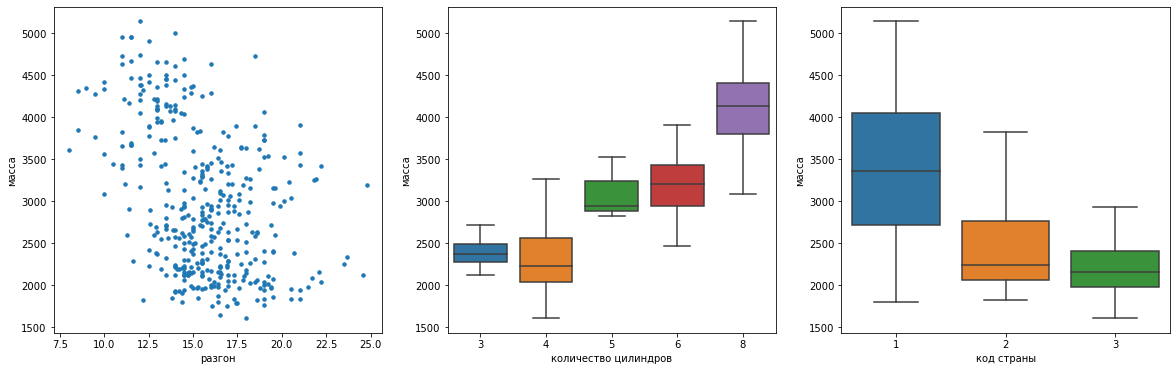

In [58]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
axs[0].scatter(data['acceleration'], data['weight'], 12)
axs[0].set_xlabel('разгон')
axs[0].set_ylabel('масса')
sns.boxplot(ax=axs[1], x=qualitive_variables[0], y='weight', data=data)
axs[1].set_xlabel('количество цилиндров')
axs[1].set_ylabel('масса')
sns.boxplot(ax=axs[2], x=qualitive_variables[1], y='weight', data=data)
axs[2].set_xlabel('код страны')
axs[2].set_ylabel('масса')
plt.savefig('независимые2')

In [59]:
print(f'Коэффициенты корреляции и значимость для acceleration и weight:')
corr, pvalue = pearsonr(data['acceleration'], data['weight'])
print(f'Коэффициент корреляции Пирсона = {corr}, p-value = {pvalue}')
corr, pvalue = spearmanr(data['acceleration'], data['weight'])
print(f'Коэффициент корреляции Спирмена = {corr}, p-value = {pvalue}')
corr, pvalue = kendalltau(data['acceleration'], data['weight'])
print(f'Коэффициент корреляции тау Кендалла = {corr}, p-value = {pvalue}')

Коэффициенты корреляции и значимость для acceleration и weight:
Коэффициент корреляции Пирсона = -0.41745731994039326, p-value = 3.243794212478762e-18
Коэффициент корреляции Спирмена = -0.4045503722902245, p-value = 4.1893044378486144e-17
Коэффициент корреляции тау Кендалла = -0.2686194049808712, p-value = 2.345629126162348e-15


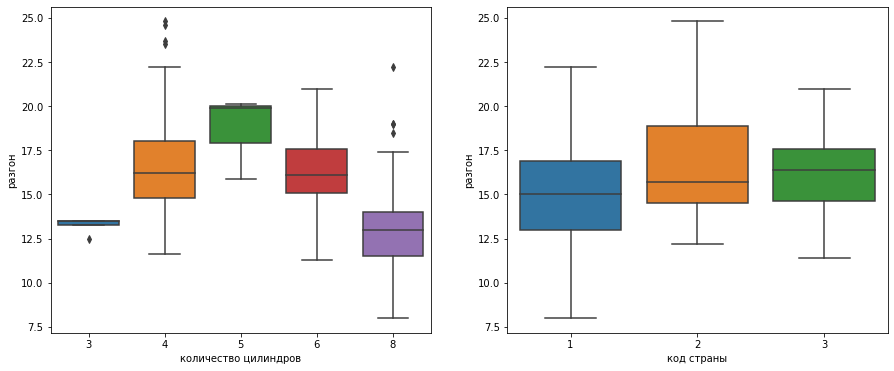

In [60]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.boxplot(ax=axs[0], x=qualitive_variables[0], y='acceleration', data=data)
axs[0].set_xlabel('количество цилиндров')
axs[0].set_ylabel('разгон')
sns.boxplot(ax=axs[1], x=qualitive_variables[1], y='acceleration', data=data)
axs[1].set_xlabel('код страны')
axs[1].set_ylabel('разгон')
plt.savefig('независимые1')

In [61]:
for x in qualitive_variables:
    _, pvalue = kruskal(data[x], data['acceleration'])
    print(f'C использованием критерия Краскела-Уоллиса для acceleration и {x} p-value = {pvalue}')

C использованием критерия Краскела-Уоллиса для acceleration и cylinders p-value = 3.304934096565586e-134
C использованием критерия Краскела-Уоллиса для acceleration и origin p-value = 5.028339859536001e-136
